# Analysis of Algorithms

This short notebook collects some Python exercises in order to support [a main document][main-doc], which talks about the use of *generating functions* in algorithms analysis. This notebook isn't verbose from the theoretical point of view but it contains the necessary code to develop and explain theoretical results instead.

[main-doc]: https://github.com/massimo-nocentini/pacc/blob/master/compiled-versions/Elaborato.pdf

As first step we load all necessary SymPy stuff:

In [104]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t

init_printing() # for nice printing, a-la' TeX

## Quicksort: average number of swap

In this section we report a simple manipulation of a formula in order to study the average number of swaps during a Quicksort execution. In the main document we obtain that $S(n)$, the function that count the average number of swaps done on a given input vector of size $n$, satisfies the following recurrence:
$$ nS(n) - (n-1)S(n-1) =  \frac{2n-3}{6} + 2\,S(n-1)$$
with little manipulation and unfolding $S(n-1)$, with $S(0) = S(1) = S(2) = 0$ as base cases, it is the same as: 
$$
\frac{S(n)}{n+1} =  \frac{S(n-1)}{n} +  \frac{2n -3}{6n(n+1)} 
$$
solving the recurrence yields:
$$\mathcal{S}(n)= \sum_{k=3}^{n}{ \frac{2k-3}{6k(k+1)} }$$

As a first step we define the abstraction bound on the rightmost summation over $k$:

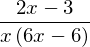

In [2]:
def f(k): return (2*k-3)/(6*(k-1)*k)
f(x)

In order to get a bound for $S(n)$, decompose it in partial fractions:

Help on function apart in module sympy.polys.partfrac:

apart(f, x=None, full=False, **options)
    Compute partial fraction decomposition of a rational function.
    
    Given a rational function ``f``, computes the partial fraction
    decomposition of ``f``. Two algorithms are available: One is based on the
    undertermined coefficients method, the other is Bronstein's full partial
    fraction decomposition algorithm.
    
    The undetermined coefficients method (selected by ``full=False``) uses
    polynomial factorization (and therefore accepts the same options as
    factor) for the denominator. Per default it works over the rational
    numbers, therefore decomposition of denominators with non-rational roots
    (e.g. irrational, complex roots) is not supported by default (see options
    of factor).
    
    Bronstein's algorithm can be selected by using ``full=True`` and allows a
    decomposition of denominators with non-rational roots. A human-readable
    result can be 

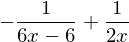

In [4]:
partfrac = f(x).apart(); help(apart); partfrac

Now it is possible to integrate the previous decomposition:

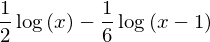

In [5]:
partfrac.integrate(x)

So the result above proves that $S(n) \in \mathcal{O}(n logn)$ as required. It is interesting to see if SymPy is able or not to solve the given recurrence for the number of swaps:

Help on function rsolve in module sympy.solvers.recurr:

rsolve(f, y, init=None)
    Solve univariate recurrence with rational coefficients.
    
    Given `k`-th order linear recurrence `\operatorname{L} y = f`,
    or equivalently:
    
    .. math:: a_{k}(n) y(n+k) + a_{k-1}(n) y(n+k-1) +
              \dots + a_{0}(n) y(n) = f(n)
    
    where `a_{i}(n)`, for `i=0, \dots, k`, are polynomials or rational
    functions in `n`, and `f` is a hypergeometric function or a sum
    of a fixed number of pairwise dissimilar hypergeometric terms in
    `n`, finds all solutions or returns ``None``, if none were found.
    
    Initial conditions can be given as a dictionary in two forms:
    
        (1) ``{   n_0  : v_0,   n_1  : v_1, ...,   n_m  : v_m }``
        (2) ``{ y(n_0) : v_0, y(n_1) : v_1, ..., y(n_m) : v_m }``
    
    or as a list ``L`` of values:
    
        ``L = [ v_0, v_1, ..., v_m ]``
    
    where ``L[i] = v_i``, for `i=0, \dots, m`, maps to `y(n_i)`.
    
    Examples
  

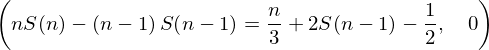

In [108]:
>>> from sympy import Function, rsolve
>>> from sympy.abc import n
>>> S = Function('S')
#>>> f = (n - 1)*y(n + 2) - (n**2 + 3*n - 2)*y(n + 1) + 2*n*(n + 1)*y(n)
>>> f = Eq(n*S(n) - (n-1)*S(n-1),   (2*n-3)/6 +  2*S(n-1))
>>> help(rsolve)
# using initial conditions seems to not work. On the other hand, not giving them, it remain pending
>>> f, rsolve(f, S(n), {S(0):0, S(1):0})


### Checks for *Equation 1.2*
The following little calculation proves the result reported in *Equation 1.2* in the main document:

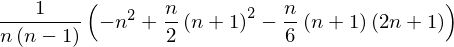

In [6]:
expr = (1/(n*(n-1)))* ((n*(n+1)**2)/2 - n*(n+1)*(2*n+1)/6 -n**2); expr

which we simplify to get the required equivalence:

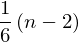

In [10]:
expr.simplify().factor()

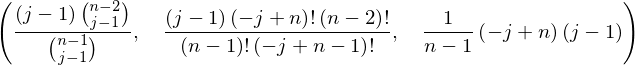

In [7]:
n,j = symbols('n j')

expr = (j-1)*binomial(n-2,j-1)/binomial(n-1,j-1)
(expr, expr.rewrite(factorial), expr.simplify())

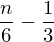

In [19]:
(1/n)*summation(expr.simplify(),(j,1,n)).simplify()

## On binomial coefficients

In the following cell we report a pair of sequences: terms in the first component belong to *central binomial coefficients* sequence, the second ones belong to *Catalan number*:

In [7]:
def central_binomial_coefficient(k): return binomial(Rational(2*k,1), k)
def catalan_number(k): return Rational(1,k+1)*central_binomial_coefficient(k)

limit = 10
([central_binomial_coefficient(k) for k in range(limit)], 
 [catalan_number(k) for k in range(limit)])

---
In this section we use the method explained in the theoretical document in order to evaluate particular binomial coefficients. We start with defining the ''kernel'' function to be expanded:

In [8]:
def f(r, z): return (1 + z)**r

### First exercise

In order to compute $ { \frac{1}{2} \choose {3} }$ we do Taylor expansion using the dummy variable $z$:

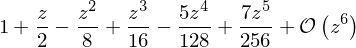

In [10]:
series(f(Rational(1,2), z))

finally take the coefficient of $z^3$, so $ { \frac{1}{2} \choose {3} } = \frac{1}{16}$

### Second exercise

In this exercise we want to compute $ { -\frac{1}{2} \choose {k} }$, for a generic $k$. It is possible to use the method as before:

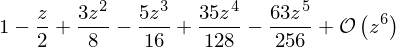

In [11]:
series(f(Rational(-1,2), z))

Otherwise we can use the manipulation (see the theoretical doc for details):
$$  {{- \frac{1}{2} }\choose{k}} = \frac{(-1)^k}{4^k} {{2k}\choose{k}}  $$
defining an helper function and building a list via comprehension:

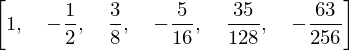

In [12]:
def helper(k): return ((-1)**k / 4**k)*binomial(2*k, k)
[helper(Rational(k,1)) for k in range(6)]

Coefficients in the previous list comprehension are the same as in Taylor expansion, as required.

### Some other exercises over binomial coefficients

The following cell shows coefficient of ${ { \frac{3}{2} } \choose {k}} $ for heading values of $k$, a rewriting to prove is the following:
$$
{ { \frac{3}{2} } \choose {k}} = \frac{(-1)^k  3  { { 2k } \choose {k}}}{4^k (3k-1)(2k-3)}
$$
using series expansion:

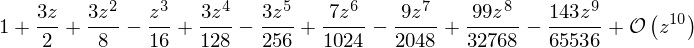

In [29]:
series(f(Rational(3,2), z), z, n=10)

while mapping the rewriting:

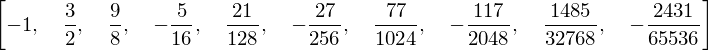

In [30]:
def three_over_two_choose_k(k): return ((-1)**k *3*binomial(2*k, k))/(4**k*(2*k-3))
[three_over_two_choose_k(Rational(k,1)) for k in range(10)]

---

The following cell shows coefficient of ${ { -\frac{3}{2} } \choose {k}} $ for heading values of $k$, a rewriting to prove is the following:
$$
{ { -\frac{3}{2} } \choose {k}} = \frac{(-1)^k  (2k + 1)}{4^k}  { { 2k } \choose {k}}
$$
using series expansion:

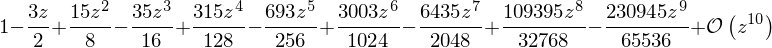

In [31]:
series(f(Rational(-3,2), z), z, n=10)

while mapping the rewriting:

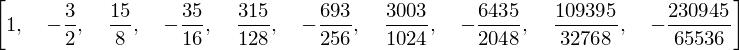

In [32]:
def minus_three_over_two_choose_k(k): return ((-1)**k *(2*k+1))*binomial(2*k, k)/4**k
[minus_three_over_two_choose_k(Rational(k,1)) for k in range(10)]

### Fibonacci numbers revisited: numericalmatrix approach, functional programming and memoization

In this section we would like to explore Fibonacci numbers using several point of view: a fast numerical implementation, a functional programming approach and, finally, a standard one provided by SymPy. We'll go under the hood, looking at the source code of the distribution to gain insights about SymPy internals.

The following code uses NumPy to perform computations:

In [88]:
import numpy as np
from numpy.linalg import eig

F_matrix = np.array([[0,1],[1,1]])
    
def fibo(n):
    
    F_init = np.array([1,1]).T
    
    for i in range(n):
        F_init = F_matrix @ F_init
        
    return F_init

[fibo(i) for i in range(300)]

[array([1, 1]),
 array([1, 2]),
 array([2, 3]),
 array([3, 5]),
 array([5, 8]),
 array([ 8, 13]),
 array([13, 21]),
 array([21, 34]),
 array([34, 55]),
 array([55, 89]),
 array([ 89, 144]),
 array([144, 233]),
 array([233, 377]),
 array([377, 610]),
 array([610, 987]),
 array([ 987, 1597]),
 array([1597, 2584]),
 array([2584, 4181]),
 array([4181, 6765]),
 array([ 6765, 10946]),
 array([10946, 17711]),
 array([17711, 28657]),
 array([28657, 46368]),
 array([46368, 75025]),
 array([ 75025, 121393]),
 array([121393, 196418]),
 array([196418, 317811]),
 array([317811, 514229]),
 array([514229, 832040]),
 array([ 832040, 1346269]),
 array([1346269, 2178309]),
 array([2178309, 3524578]),
 array([3524578, 5702887]),
 array([5702887, 9227465]),
 array([ 9227465, 14930352]),
 array([14930352, 24157817]),
 array([24157817, 39088169]),
 array([39088169, 63245986]),
 array([ 63245986, 102334155]),
 array([102334155, 165580141]),
 array([165580141, 267914296]),
 array([267914296, 433494437]),
 arr

Previous computation overflows: fast but bad :(

On the other hand, in the following code we'll use symbolic SymPy computations. We start by coding the matrix seen above using a SymPy object that belong to Matrix class. It is very interesting to see the eigen-values of that matrix...they recall something, don't they?

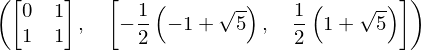

In [72]:
F_matrix = Matrix([[0,1],[1,1]])
F_matrix, list(map(factor, F_matrix.eigenvals()))

we can code the computation as a *fold* (Python calls it *reduce*) operation, providing the initial value:

In [74]:
from functools import reduce 

def fibo(n):
        
    F_init = Matrix([[1,1]]).T
    
    return reduce(lambda v,e: F_matrix * v, range(n), F_init)
    
    # Previous `reduce' application means the following:
    
    #for i in range(n):
    #    F_init = F_matrix * F_init   
    #return F_init

here we provide a memoized implementation, coded by hand, to show how the decorator _recurrence_memo_ can be used. Such decorator is supplied by SymPy, however Python standard library provides its own [functools.lru_cache][lru_cache].

[lru_cache]:https://docs.python.org/3/library/functools.html#functools.lru_cache

In [89]:
from sympy.utilities.memoization import *

@recurrence_memo([1,1])
def memoized_fibonacci(n,prev): return prev[-1] + prev[-2]

In [103]:
def time_them(elements=600):

    # it uses memoization implemented by hand a little above
    %time [memoized_fibonacci(i) for i in range(elements)]

    # it uses SymPy implementation, coded in sympy/mpmath/libmp/libintmath.py, 
    # referenced by sympy/functions/combinatorial/numbers.py (here it is interesting
    # to look at how a function can be defined to belong to SymPy hierarchy)
    %time [fibonacci(i) for i in range(elements)]

    # it uses matrix implementation, without memoization
    %time [fibo(i) for i in range(elements)]

for i, e in enumerate(range(100,801,50)):
    print("iteration {0} asking for {1} Fibonacci numbers\n".format(i,e))
    time_them(elements=700)
    print(("-" * 75) + "\n")
    
print("#" * 75)
print("repeating an already computed call should be smart for the former two implementations...\n")
for elem in [150, 300, 600, 800]:
    print("iteration asking for {0} *already seen* Fibonacci numbers\n".format(e))
    time_them(elem)
    print(("-" * 75) + "\n")
    
None

# the following mapping allows us to extract a sequence of numbers 
# instead of a list of vectors
# %time list(map(lambda v: v[0], [fibo(i) for i in range(elements)]))

iteration 0 asking for 100 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 266 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 578 µs
CPU times: user 628 ms, sys: 0 ns, total: 628 ms
Wall time: 624 ms
---------------------------------------------------------------------------

iteration 1 asking for 150 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 493 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.19 ms
CPU times: user 668 ms, sys: 0 ns, total: 668 ms
Wall time: 669 ms
---------------------------------------------------------------------------

iteration 2 asking for 200 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 553 µs
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.33 ms
CPU times: user 728 ms, sys: 0 ns, total: 728 ms
Wall time: 726 ms
---------------------------------------------------------------------------

iteration 3 asking for 250 Fibonacci numbers

CPU 

In [210]:
def ascii_code(c): return ord(c) - ord('A')

modulo=26

def decipher(pair):
    k,c = pair
    return (c - k) % modulo

def cipher(pair):
    p,k = pair
    return (p + k) % modulo

chipher_text = map(lambda p: chr(p + ord('A')), map(cipher, zip(map(ascii_code, "SPIGADIGRANO"),
                  map(ascii_code,"TIVOGLIOBENE"))))
chiper_text = ''.join(chipher_text)

right_plain = map(lambda p: chr(p + ord('A')), map(decipher, zip(map(ascii_code, "TIVOGLIOBENE"),
                  map(ascii_code,chiper_text))))
right_plain = ''.join(right_plain)

wrong_plain = map(lambda p: chr(p + ord('A')), map(decipher, zip(map(ascii_code, "TIVOGLIOBENE"),
                  map(ascii_code,"BSMGMOSUSEBS"))))
wrong_plain = ''.join(wrong_plain)

chiper_text, right_plain, wrong_plain


('LXDUGOQUSEAS', 'SPIGADIGRANO', 'IKRSGDKGRAOO')

# Generating Functions

### Convolution

In [122]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t))
use_me,use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

In [34]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t)**-1)
use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

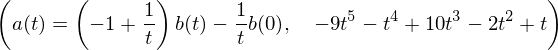

In [35]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (t**-1 -1) -b.func(0)*t**-1)
fut = lambda t: 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5 
use_me,use_me.subs(b, fut(t)).subs(b.subs(t,0),fut(0)).rhs.series().expand()

---

# *SymPy* sandbox

In [36]:
pi.evalf(100)

In [37]:
a = symbols('a0:10')
a

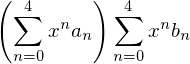

In [15]:
x = numbered_symbols('x')
next(x), next(x)
x = Symbol('x')
ai = IndexedBase('a')
bi = IndexedBase('b')
a = Sum(ai[n]*x**n, (n, 0, 4))
b = Sum(bi[n]*x**n, (n, 0, 4))
expand(a*b)


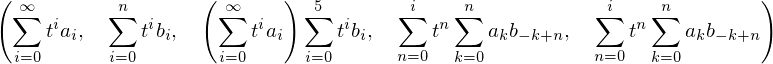

In [39]:
k, k0, k1, k2, t, i = symbols('k k:3 t i')
k_gen = numbered_symbols('a')
a_k = IndexedBase('a')
b_n_k = IndexedBase('b')
i_tuple = (i, 0, n)
a_sum = summation(a_k[i]*t**i, (i,0,oo) )
b_sum = Sum(b_n_k[i]*t**i, i_tuple)
limit = 5
a_b_prod = a_sum.subs(n,limit) * b_sum.subs(n,limit)
G_conv = Sum(Sum(a_k[k] * b_n_k[n-k], (k, 0, n))*t**n, (n, 0, i))
a_sum.subs(n,5).doit(), b_sum, expand(a_b_prod,mul=True), G_conv, G_conv

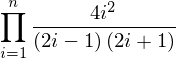

In [40]:
W2 = Product(2*i/(2*i-1)*2*i/(2*i+1), (i, 1, n))
W2 # it should print: Product(4*i**2/((2*i - 1)*(2*i + 1)), (i, 1, n))

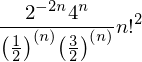

In [41]:
W2e = W2.doit()
W2e # it should return: 2**(-2*n)*4**n*(factorial(n))**2/(RisingFactorial(1/2, n)*RisingFactorial(3/2, n))

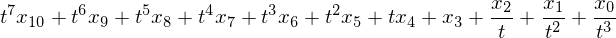

In [42]:
x = numbered_symbols('x')
k = numbered_symbols('k')
xi = IndexedBase('x')
expand((next(x) + next(x) + next(x))*(next(k) + next(k) + next(k)))
my_sum = (Sum(xi[i]*t**i, (i,0, n))).subs(n,5).doit().subs(xi[5],4)
(my_sum * my_sum)
simplify(Sum(xi[i]*t**i, (i,0, n)).subs(n,10).doit()/t**3)

In [43]:
a = IndexedBase('a')
s = Sum(xi[i]*t**i, (i,0, n))
f = Lambda(t, t+1)
f

In [60]:
series(t/(1-t)**2, n=10)

$d_{nk}$ is the number of *Collatz chains* of length $n$ with $k$ inversions

# $A=B$

In [7]:
def an_example(n): return factorial(n+1)/factorial(n)

an_example(n).simplify()

Help on method rewrite in module sympy.core.basic:

rewrite(*args, **hints) method of sympy.core.mul.Mul instance
    Rewrite functions in terms of other functions.
    
    Rewrites expression containing applications of functions
    of one kind in terms of functions of different kind. For
    example you can rewrite trigonometric functions as complex
    exponentials or combinatorial functions as gamma function.
    
    As a pattern this function accepts a list of functions to
    to rewrite (instances of DefinedFunction class). As rule
    you can use string or a destination function instance (in
    this case rewrite() will use the str() function).
    
    There is also the possibility to pass hints on how to rewrite
    the given expressions. For now there is only one such hint
    defined called 'deep'. When 'deep' is set to False it will
    forbid functions to rewrite their contents.
    
    Examples
    
    >>> from sympy import sin, exp
    >>> from sympy.abc import x
   

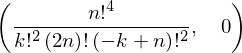

In [27]:
def rhs(n): return binomial(2*n,n)
def t(n,k): return binomial(n,k)**2
def F(n,k): return t(n,k)/rhs(n)
def R(n,k): return -((3*n + 3-2*k)*k**2)/(2*(2*n+1)*(n+1-k)**2)
def G(n,k): return R(n,k)*F(n,k)
k= Symbol('k')
f=F(n,k)
help(f.rewrite)
f.rewrite(factorial), (F(n+1,k)-F(n,k)-G(n,k+1)+G(n,k)).simplify()

## Exercises

The following is exercise 1 of section 2.7

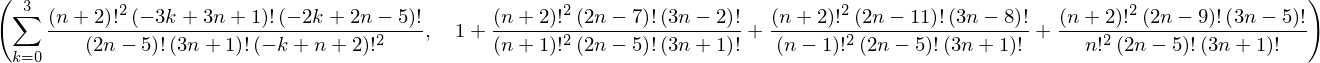

In [7]:
def f(n): return (factorial(3*n+1)*factorial(2*n-5))/((factorial(n+2))**2)
n,k=symbols('n k')
_sum = Sum(f(n-k)/f(n), (k,0,3))
_sum, _sum.doit()

In [9]:
hyper([],[],t).simplify()

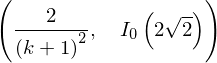

In [26]:
def term(k): return (2**k)/(factorial(k)**2)
(term(k+1)/term(k)).simplify(), Sum(term(k),(k,0,oo)).doit()